In [1]:
import pandas as pd
df = pd.read_csv('Walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


Analyzing the sample data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125214 entries, 0 to 125213
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     125214 non-null  int64  
 1   Product_ID                  125213 non-null  object 
 2   Gender                      125213 non-null  object 
 3   Age                         125213 non-null  object 
 4   Occupation                  125213 non-null  float64
 5   City_Category               125213 non-null  object 
 6   Stay_In_Current_City_Years  125213 non-null  object 
 7   Marital_Status              125213 non-null  float64
 8   Product_Category            125213 non-null  float64
 9   Purchase                    125213 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 9.6+ MB


In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,1.252140e+05,125213.000000,125213.000000,125213.000000,125213.000000
mean,1.002861e+06,8.073315,0.409965,5.298515,9305.255293
std,3.342540e+03,6.541858,0.491829,3.739806,4978.651680
min,1.000000e+01,0.000000,0.000000,1.000000,185.000000
25%,1.001243e+06,2.000000,0.000000,1.000000,5853.000000
50%,1.002872e+06,7.000000,0.000000,5.000000,8052.000000
75%,1.004379e+06,14.000000,1.000000,8.000000,12057.000000
max,1.006040e+06,20.000000,1.000000,18.000000,23961.000000


In [6]:
df['Gender'].value_counts()

M    94468
F    30745
Name: Gender, dtype: int64

In [7]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1647
M    4205
Name: User_ID, dtype: int64

In [9]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,30745.0,8776.171117,4692.525634,188.0,5450.00,7924.0,11403.00,23948.0
M,94468.0,9477.447919,5056.386848,185.0,5890.75,8101.0,12517.25,23961.0


In [10]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0.0,73880.0,9291.655739,4985.148539,185.0,5830.0,8043.0,12058.0,23961.0
1.0,51333.0,9324.828181,4969.269495,187.0,5881.0,8064.0,12057.0,23961.0


<Axes: xlabel='Gender', ylabel='Purchase'>

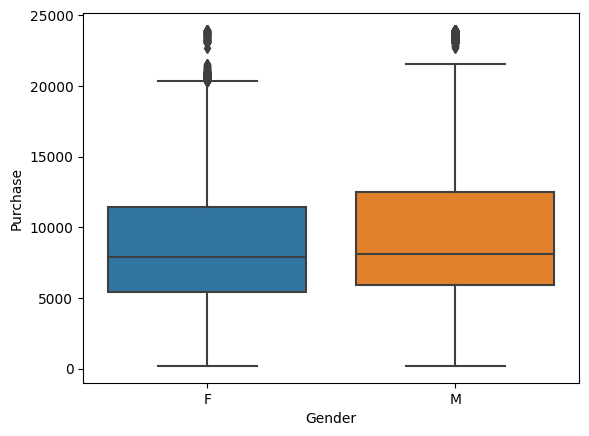

In [12]:
import seaborn as sbn
sbn.boxplot(x='Gender', y='Purchase', data =df)

We can say that the median purchase of males is higher than that of women from the above observation for sample data.

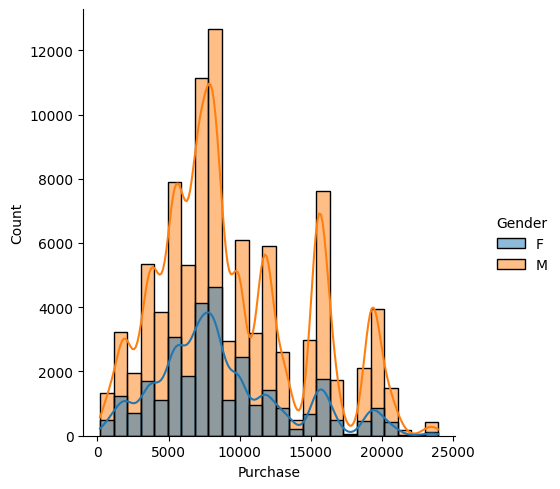

In [13]:
sbn.displot(x='Purchase', hue='Gender', data=df, bins=25, kde=True)

In [14]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,30745.0,8776.171117,4692.525634,188.0,5450.00,7924.0,11403.00,23948.0
M,94468.0,9477.447919,5056.386848,185.0,5890.75,8101.0,12517.25,23961.0


In [15]:
df.sample(500).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,129.0,9351.472868,4762.624369,741.0,6024.0,8620.0,12005.0,21009.0
M,371.0,9779.436658,5116.743805,716.0,5918.5,8604.0,14675.0,23792.0


In [48]:
male_sample_means=[df[df['Gender']=='M'].sample(900, replace=True)['Purchase'].mean() for i in range(1000)]

In [49]:
female_sample_means=[df[df['Gender']=='F'].sample(900, replace=True)['Purchase'].mean() for i in range(1000)]

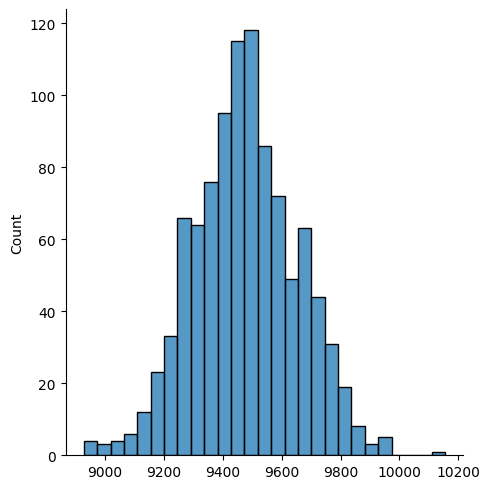

In [50]:
sbn.displot(male_sample_means)

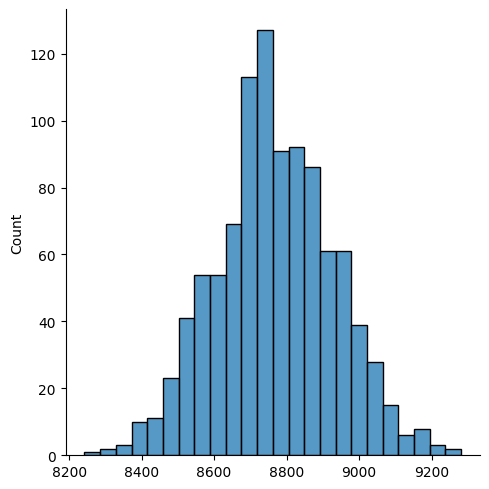

In [51]:
sbn.displot(female_sample_means)

confidence_interval = means of SD +- Z score

In [52]:
import numpy as np
males_upper= np.mean(male_sample_means) + 1.96 * np.std(male_sample_means)
males_lower=np.mean(male_sample_means) - 1.96 * np.std(male_sample_means)

In [53]:
females_upper= np.mean(female_sample_means) + 1.96 * np.std(female_sample_means)
females_lower= np.mean(female_sample_means) - 1.96 * np.std(female_sample_means)

In [54]:
males_lower, males_upper

(9132.192462740824, 9821.7210794814)

In [55]:
females_lower, females_upper

(8447.628844891326, 9088.17073955312)

We can conclude through Confidence Interval that males purchase higher than women.

In [56]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0.0,73880.0,9291.655739,4985.148539,185.0,5830.0,8043.0,12058.0,23961.0
1.0,51333.0,9324.828181,4969.269495,187.0,5881.0,8064.0,12057.0,23961.0


<Axes: xlabel='Marital_Status', ylabel='Purchase'>

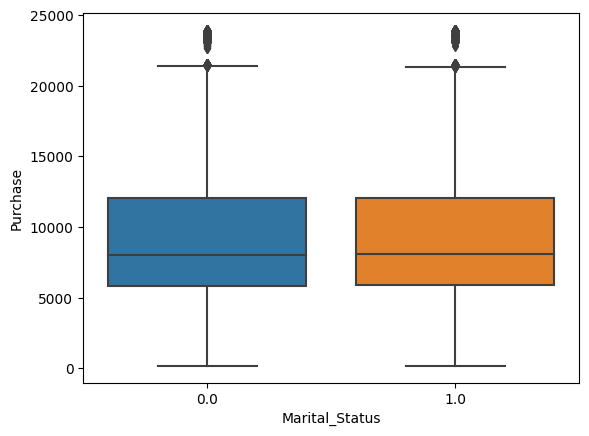

In [57]:
import seaborn as sbn
sbn.boxplot(x='Marital_Status', y='Purchase', data =df)

The median purchase amount for both married and unmarried are similar.

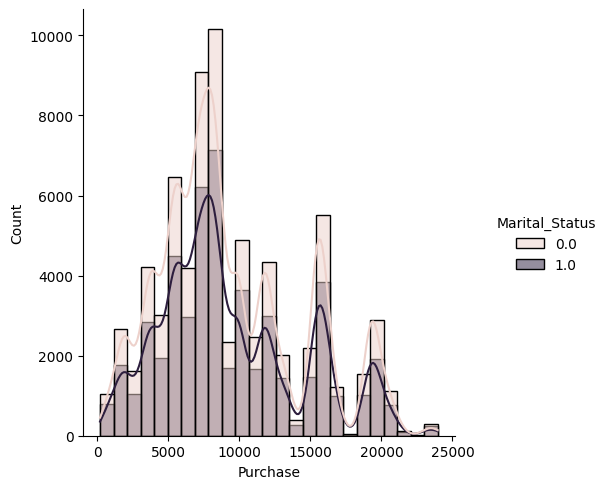

In [58]:
sbn.displot(x='Purchase', hue='Marital_Status', data=df, bins=25, kde=True)

In [59]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0.0,73880.0,9291.655739,4985.148539,185.0,5830.0,8043.0,12058.0,23961.0
1.0,51333.0,9324.828181,4969.269495,187.0,5881.0,8064.0,12057.0,23961.0


In [60]:
df.sample(500).groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0.0,300.0,8518.62,4755.865132,555.0,5336.5,7895.0,10960.00,23227.0
1.0,200.0,9423.65,5102.633499,404.0,5438.0,8240.0,13106.25,23547.0


In [61]:
unmarried_sample_mean=[df[df['Marital_Status']==0].sample(900, replace=True)['Purchase'].mean() for i in range(1000)]

In [62]:
married_sample_mean=[df[df['Marital_Status']==1].sample(900, replace=True)['Purchase'].mean() for i in range(1000)]

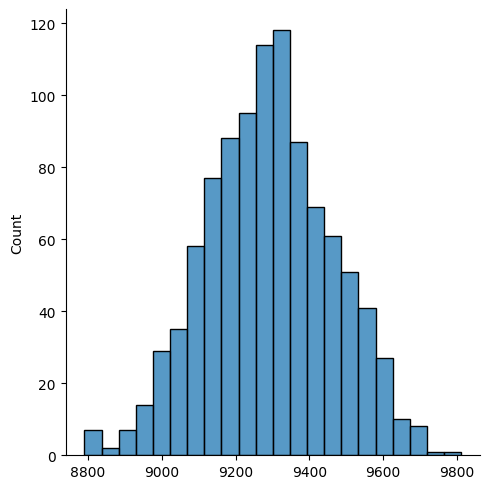

In [63]:
sbn.displot(unmarried_sample_mean)

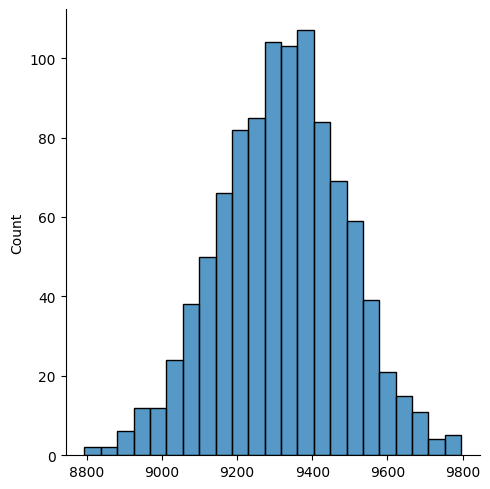

In [64]:
sbn.displot(married_sample_mean)

In [69]:
unmarried_upper= np.mean(unmarried_sample_mean) + 1.96 * np.std(unmarried_sample_mean)
unmarried_lower=np.mean(unmarried_sample_mean) - 1.96 * np.std(unmarried_sample_mean)

In [70]:
married_upper= np.mean(married_sample_mean) + 1.96 * np.std(married_sample_mean)
married_lower=np.mean(married_sample_mean) - 1.96 * np.std(married_sample_mean)

In [71]:
unmarried_upper, unmarried_lower

(9624.042644035007, 8958.131702631656)

In [72]:
married_upper, married_lower

(9647.778527476154, 8993.507112523848)

since the confidence interval for ummarried and married are almost same. We can conclude marital status does not have any impact on sales